<a href="https://colab.research.google.com/github/AhmedZaghl0ul/Machine-Learning/blob/main/Housing_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/housing-prices-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/housing-prices-dataset


In [ ]:
import os

# List files in the directory
files = os.listdir(path)
print("Files in the dataset directory:", files)

Files in the dataset directory: ['Housing.csv']


In [ ]:
df = pd.read_csv("/kaggle/input/housing-prices-dataset/Housing.csv")

In [ ]:
df.isna().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
for i in df.columns:
  print(df[i].value_counts() , "\n==========================================\n")

price
4200000    17
3500000    17
4900000    12
5250000     9
5600000     9
           ..
2135000     1
1960000     1
1855000     1
1820000     1
1767150     1
Name: count, Length: 219, dtype: int64 

area
6000    24
3000    14
4500    13
4000    11
6600     9
        ..
3360     1
1700     1
3649     1
2990     1
3620     1
Name: count, Length: 284, dtype: int64 

bedrooms
3    300
2    136
4     95
5     10
6      2
1      2
Name: count, dtype: int64 

bathrooms
1    401
2    133
3     10
4      1
Name: count, dtype: int64 

stories
2    238
1    227
4     41
3     39
Name: count, dtype: int64 

mainroad
yes    468
no      77
Name: count, dtype: int64 

guestroom
no     448
yes     97
Name: count, dtype: int64 

basement
no     354
yes    191
Name: count, dtype: int64 

hotwaterheating
no     520
yes     25
Name: count, dtype: int64 

airconditioning
no     373
yes    172
Name: count, dtype: int64 

parking
0    299
1    126
2    108
3     12
Name: count, dtype: int64 

prefarea
no  

In [ ]:
cat = [i for i in df.columns if df[i].dtype == 'O']
num = [i for i in df.columns if df[i].dtype != 'O']

In [ ]:
print(cat , '\n' , num)

['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'] 
 ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']


In [ ]:
!pip install category_encoders

In [ ]:
import category_encoders as ce

encoder = ce.OneHotEncoder(cols=cat, use_cat_names=True)
df = encoder.fit_transform(df)

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad_yes,mainroad_no,guestroom_no,guestroom_yes,basement_no,...,hotwaterheating_no,hotwaterheating_yes,airconditioning_yes,airconditioning_no,parking,prefarea_yes,prefarea_no,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,1,0,1,...,1,0,1,0,2,1,0,1,0,0
1,12250000,8960,4,4,4,1,0,1,0,1,...,1,0,1,0,3,0,1,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,...,1,0,0,1,2,1,0,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,0,...,1,0,1,0,3,1,0,1,0,0
4,11410000,7420,4,1,2,1,0,0,1,0,...,1,0,1,0,2,0,1,1,0,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler

sc = StandardScaler()
df[num] = sc.fit_transform(df[num])

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad_yes,mainroad_no,guestroom_no,guestroom_yes,basement_no,...,hotwaterheating_no,hotwaterheating_yes,airconditioning_yes,airconditioning_no,parking,prefarea_yes,prefarea_no,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,4.566365,1.046726,1.403419,1.421812,1.378217,1,0,1,0,1,...,1,0,1,0,1.517692,1,0,1,0,0
1,4.004484,1.757010,1.403419,5.405809,2.532024,1,0,1,0,1,...,1,0,1,0,2.679409,0,1,1,0,0
2,4.004484,2.218232,0.047278,1.421812,0.224410,1,0,1,0,0,...,1,0,0,1,1.517692,1,0,0,1,0
3,3.985755,1.083624,1.403419,1.421812,0.224410,1,0,1,0,0,...,1,0,1,0,2.679409,1,0,1,0,0
4,3.554979,1.046726,1.403419,-0.570187,0.224410,1,0,0,1,0,...,1,0,1,0,1.517692,0,1,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split
x = df.drop('price' , axis=1)
y = df['price']

xtrain , xtest , ytrain , ytest = train_test_split(x , y, test_size=0.3 , random_state=40)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error

In [ ]:
lg = LinearRegression(n_jobs=-1)
lg.fit(xtrain , ytrain)
ypred = lg.predict(xtest)
print(r2_score(ytest , ypred))

0.6356218045508806


In [ ]:
svr = SVR()
params = {
    "kernel": ["rbf", "poly", "linear"],
    "C": [0.1, 1, 10, 100 , 200],
    "epsilon": [0.01, 0.1, 0.2, 0.5]
}

grid = GridSearchCV(
    svr,
    params,
    scoring="r2",
    cv=5,
    n_jobs=-1
)

grid.fit(xtrain, ytrain)

print("Best Parameters:", grid.best_params_)
model = grid.best_estimator_

ypred = model.predict(xtest)

print("R2:", r2_score(ytest, ypred))
print("MAE:", mean_absolute_error(ytest, ypred))
print("MSE:", mean_squared_error(ytest, ypred))

Best Parameters: {'C': 0.1, 'epsilon': 0.5, 'kernel': 'linear'}
R2: 0.6348924196539577
MAE: 0.4563091095403255
MSE: 0.42817621682047347


In [ ]:
best_svr = SVR(C=0.1 , epsilon=0.5 , kernel ='linear')
best_svr.fit(xtrain, ytrain)
ypred = best_svr.predict(xtest)

print("R2:", r2_score(ytest, ypred))
print("MAE:", mean_absolute_error(ytest, ypred))
print("MSE:", mean_squared_error(ytest, ypred))

R2: 0.6348924196539577
MAE: 0.4563091095403255
MSE: 0.42817621682047347


Text(0.5, 1.0, 'Accuracy vs K')

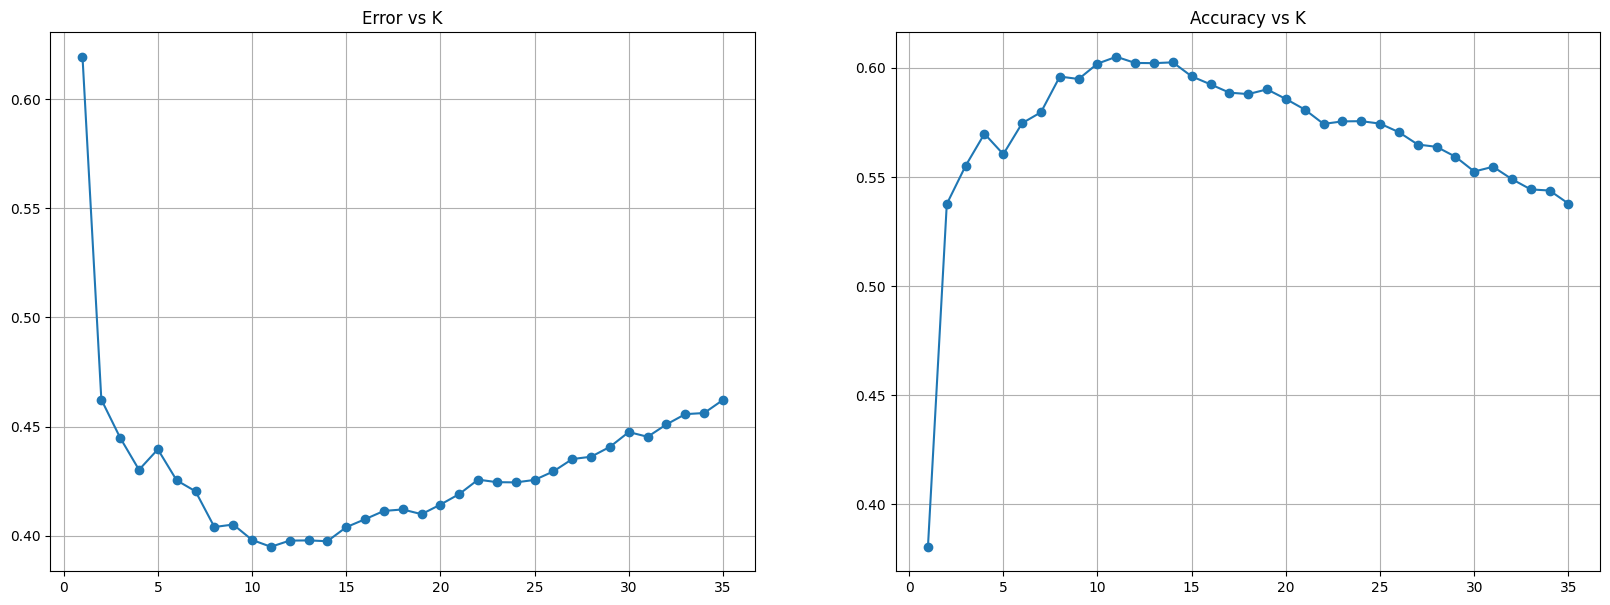

In [ ]:
k = 35
error = []
accuracy = []

for i in range(1, k+1):
  knn = KNeighborsRegressor(n_neighbors=i)
  knn.fit(xtrain , ytrain)
  ypred = knn.predict(xtest)
  error.append(1- r2_score(ytest , ypred))
  accuracy.append(r2_score(ytest , ypred))


plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.plot(range(1,36) , error , marker='o')
plt.grid()
plt.title('Error vs K')

plt.subplot(1,2,2)
plt.plot(range(1,36) , accuracy , marker='o')
plt.grid()
plt.title('Accuracy vs K')

In [ ]:
knn = KNeighborsRegressor(6)
knn.fit(xtrain, ytrain)
ypred = knn.predict(xtest)
print(r2_score(ytest , ypred))
print(mean_absolute_error(ytest, ypred))
print(mean_squared_error(ytest, ypred))

0.5746585172090393
0.47864079586473346
0.49881491582736526


In [ ]:
# dt = DecisionTreeRegressor(random_state=42)



# params = {
#     'max_depth': [5, 10, 15, 20],
#     'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
#     'min_samples_leaf': [2, 5, 10, 15, 20],
#     'min_samples_split': [2, 5, 10, 15, 20],
# }

# rnc = GridSearchCV(
#     dt,
#     params,
#     n_jobs=-1,
#     scoring='r2',
#     cv=10
# )

# rnc.fit(xtrain, ytrain)

# print("Best Estimator:", rnc.best_estimator_)
# model = rnc.best_estimator_
# ypred = model.predict(xtest)

# print("R2:", r2_score(ytest, ypred))

In [ ]:
best_dt = DecisionTreeRegressor(criterion='absolute_error', max_depth=10, min_samples_leaf=5, min_samples_split=20,random_state=42)
best_dt.fit(xtrain , ytrain)
ypred = best_dt.predict(xtest)

print("R2:", r2_score(ytest, ypred))
print("MAE:", mean_absolute_error(ytest, ypred))
print("MSE:", mean_squared_error(ytest, ypred))

R2: 0.47687412460851875
MAE: 0.5595513287056593
MSE: 0.613490571830169


In [ ]:
# rf = RandomForestRegressor(random_state=42)

# params = {
#     'max_depth': list(range(5, 21)),
#     'n_estimators': [100, 200, 300, 400],
#     'min_samples_leaf': list(range(2, 21)),
#     'min_samples_split': list(range(2, 21)),
#     'bootstrap': [False, True]
# }

# rnc = RandomizedSearchCV(
#     rf,
#     param_distributions=params,
#     n_jobs=-1,
#     n_iter=40,
#     scoring='r2',
#     cv=5,
#     random_state=42
# )

# rnc.fit(xtrain , ytrain)

# print("Best Estimator:", rnc.best_estimator_)
# model = rnc.best_estimator_

# ypred = model.predict(xtest)

# print("R2:", r2_score(ytest, ypred))

In [ ]:
best_rf = RandomForestRegressor(max_depth=8, min_samples_leaf=2, min_samples_split=13, random_state=42)

best_rf.fit(xtrain , ytrain)

ypred = best_rf.predict(xtest)

print("R2:", r2_score(ytest, ypred))
print("MAE:", mean_absolute_error(ytest, ypred))
print("MSE:", mean_squared_error(ytest, ypred))

R2: 0.591243939935076
MAE: 0.4868610038184715
MSE: 0.479364529312596
